## 1. Horner’s method 
of synthetic division is an efficient way to evaluate the polynomial $P(x)=a_N x^N+a_{N-1} x^{N-1}+\cdots+a_2 x^2+a_1 x+a_0$.  The same method can be adopted to evaluate the derivative $$
P'(x)=N a_N x^{N-1}+(N-1) a_{N-1} x^{N-2}+\cdots+2 a_2 x+a_1,
$$
and the indefinite integral $I(x)$
$$
I(x)=\frac{a_N x^{N+1}}{N+1}+\frac{a_{N-1} x^N}{N}+\cdots+\frac{a_2 x^3}{3}+\frac{a_1 x^2}{2}+a_0 x+C
$$ Write a code for evaluating P (x), P ′ (x) and I(x) using Horner’s method. The input will
be N , the coefficients A[i], constant C and independent variable X[i].

In [1]:
def evaluate_polynomial(N, A, X):
    result = A[N]
    for i in range(N-1, -1, -1):
        result = result * X + A[i]
    return result

def evaluate_derivative(N, A, X):
    result = N * A[N]
    for i in range(N-1, 0, -1):
        result = result * X + i * A[i]
    return result

def evaluate_integral(N, A, X, C):
    result = (A[N] / (N + 1)) * X**(N + 1)
    for i in range(N-1, 0, -1):
        result = result * X + (A[i] / i) * X**i
    result = result + C * X
    return result


In [2]:
# Example usage:
N = 3  # degree of the polynomial
A = [2, -3, 1, 5]  # coefficients of the polynomial
X = 2  # value of the independent variable
C = 1  # constant in the indefinite integral

# Evaluate polynomial P(x)
result_polynomial = evaluate_polynomial(N, A, X)
print(f"P({X}) =", result_polynomial)

# Evaluate derivative P'(x)
result_derivative = evaluate_derivative(N, A, X)
print(f"P'({X}) =", result_derivative)

# Evaluate indefinite integral I(x)
result_integral = evaluate_integral(N, A, X, C)
print(f"I({X}) =", result_integral)


P(2) = 40
P'(2) = 61
I(2) = 80.0


## 2. Using the above code, evaluate the value of e 
accurate to 13 decimal digits by summing
the required terms in the Taylor polynomial approximation.

In [4]:
import math

# Function to evaluate the Taylor series for e^x
def compute_e_terms(x, terms):
    result = 1
    current_term = 1

    for i in range(1, terms):
        current_term *= x / i
        result += current_term

    return result

# Set the precision (number of terms in the Taylor series)
precision = 13  # Adjust this value as needed for desired precision

# Evaluate e using Taylor series with the specified precision
e_approximation = compute_e_terms(1, precision)

# Print the result
print(f"Approximation of e with {precision} terms:", e_approximation)

# Print the actual value of e for comparison
print("Actual value of e:", math.e)


Approximation of e with 13 terms: 2.7182818282861687
Actual value of e: 2.718281828459045


## 3. Assume that a polynomial 
$$P(x) = A + Bx + Cx^2 + Dx^3$$ passes through points (1, 1.06),
(2, 1.12), (3, 1.34), and (5, 1.78). Set up the Vandermonde matrix and obtain the coeffi-
cients.

In [5]:
def gauss_elimination(A, B):
    n = len(B)

    # Augmenting the matrix A with the column B
    augmented_matrix = [row + [B[i]] for i, row in enumerate(A)]

    # Forward elimination
    for i in range(n):
        # Make the diagonal element 1
        factor = augmented_matrix[i][i]
        for j in range(i, n + 1):
            augmented_matrix[i][j] /= factor

        # Make the other rows 0 in the current column
        for k in range(i + 1, n):
            factor = augmented_matrix[k][i]
            for j in range(i, n + 1):
                augmented_matrix[k][j] -= factor * augmented_matrix[i][j]

    # Back substitution
    x = [0] * n
    for i in range(n - 1, -1, -1):
        x[i] = augmented_matrix[i][n]
        for j in range(i + 1, n):
            x[i] -= augmented_matrix[i][j] * x[j]

    return x

# Given points
points = [(1, 1.06), (2, 1.12), (3, 1.34), (5, 1.78)]

# Construct the Vandermonde matrix and the y vector
Vandermonde_matrix = [[point[0]**i for i in range(4)] for point in points]
y_vector = [point[1] for point in points]

# Solve the system of equations
coefficients = gauss_elimination(Vandermonde_matrix, y_vector)

# Print the coefficients
print("Coefficients (A, B, C, D):", coefficients)


Coefficients (A, B, C, D): [1.2799999999999998, -0.3999999999999997, 0.1999999999999999, -0.01999999999999999]


## 4. Consider y = f (x) = cos(x) 
over [0.0, 1.2]. Use two-, three-, and four-nodes (at equal in-
tervals), to construct linear, quadratic, and cubic interpolating polynomials, respectively.
Compare the approximation with the exact curve.

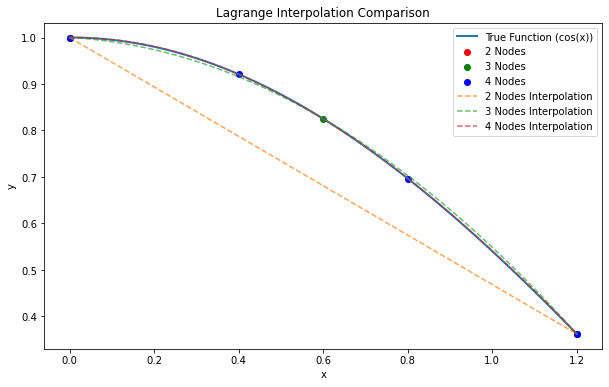

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp):
    n = len(x)
    result = 0.0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (x_interp - x[j]) / (x[i] - x[j])
        result += term

    return result

# Function to approximate
def true_function(x):
    return np.cos(x)

# Interval [0.0, 1.2]
x_interval = np.linspace(0.0, 1.2, 100)
y_true = true_function(x_interval)

# Nodes for two-nodes, three-nodes, and four-nodes interpolation
x_2_nodes = np.linspace(0.0, 1.2, 2)
x_3_nodes = np.linspace(0.0, 1.2, 3)
x_4_nodes = np.linspace(0.0, 1.2, 4)

# Interpolation using Lagrange polynomial
y_interp_2_nodes = [lagrange_interpolation(x_2_nodes, true_function(x_2_nodes), x) for x in x_interval]
y_interp_3_nodes = [lagrange_interpolation(x_3_nodes, true_function(x_3_nodes), x) for x in x_interval]
y_interp_4_nodes = [lagrange_interpolation(x_4_nodes, true_function(x_4_nodes), x) for x in x_interval]

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(x_interval, y_true, label='True Function (cos(x))', linewidth=2)
plt.scatter(x_2_nodes, true_function(x_2_nodes), color='red', label='2 Nodes', marker='o')
plt.scatter(x_3_nodes, true_function(x_3_nodes), color='green', label='3 Nodes', marker='o')
plt.scatter(x_4_nodes, true_function(x_4_nodes), color='blue', label='4 Nodes', marker='o')
plt.plot(x_interval, y_interp_2_nodes, '--', label='2 Nodes Interpolation', alpha=0.7)
plt.plot(x_interval, y_interp_3_nodes, '--', label='3 Nodes Interpolation', alpha=0.7)
plt.plot(x_interval, y_interp_4_nodes, '--', label='4 Nodes Interpolation', alpha=0.7)
plt.title('Lagrange Interpolation Comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 5. Obtain the Lagrange coefficient 
polynomials L3,0 (x), L3,1 (x), L3,2 (x), and L3,3 (x) for the data points for the previous problem. Then obtain the Lagrange polynomial P3 (x) using  $P_3(x)=\sum_{k=0}^3 y_k L_{3, k}(x)$

(a) Plot Lagrange coefficient polynomials, L3,0 (x), L3,1 (x), L3,2 (x),

(b) Compare the result thus obtained with the previous problem.

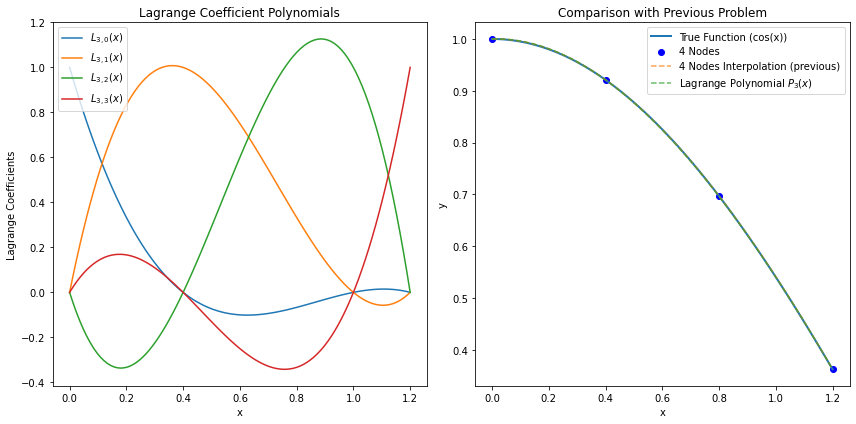

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(x_nodes, k, x_interp):
    result = 1.0
    for j in range(len(x_nodes)):
        if j != k:
            result *= (x_interp - x_nodes[j]) / (x_nodes[k] - x_nodes[j])
    return result

def lagrange_interpolation_coefficients(x_nodes, y_nodes, x_interp):
    n = len(x_nodes)
    result = [lagrange_basis(x_nodes, k, x_interp) for k in range(n)]
    return result

# Given data points
x_nodes = np.array([0.0, 0.4, 1.0, 1.2])
y_nodes = np.cos(x_nodes)

# Lagrange coefficients for cubic interpolation
x_interp = np.linspace(0.0, 1.2, 100)
L_3_0 = [lagrange_basis(x_nodes, 0, x) for x in x_interp]
L_3_1 = [lagrange_basis(x_nodes, 1, x) for x in x_interp]
L_3_2 = [lagrange_basis(x_nodes, 2, x) for x in x_interp]
L_3_3 = [lagrange_basis(x_nodes, 3, x) for x in x_interp]

# Plot Lagrange coefficient polynomials
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x_interp, L_3_0, label='$L_{3,0}(x)$')
plt.plot(x_interp, L_3_1, label='$L_{3,1}(x)$')
plt.plot(x_interp, L_3_2, label='$L_{3,2}(x)$')
plt.plot(x_interp, L_3_3, label='$L_{3,3}(x)$')
plt.title('Lagrange Coefficient Polynomials')
plt.xlabel('x')
plt.ylabel('Lagrange Coefficients')
plt.legend()

# Lagrange polynomial P_3(x) using the coefficients
P_3_x = np.sum([y_nodes[k] * lagrange_basis(x_nodes, k, x_interp) for k in range(4)], axis=0)

# Plot comparison with the previous problem
plt.subplot(1, 2, 2)
plt.plot(x_interval, y_true, label='True Function (cos(x))', linewidth=2)
plt.scatter(x_4_nodes, true_function(x_4_nodes), color='blue', label='4 Nodes', marker='o')
plt.plot(x_interval, y_interp_4_nodes, '--', label='4 Nodes Interpolation (previous)', alpha=0.7)
plt.plot(x_interp, P_3_x, '--', label='Lagrange Polynomial $P_3(x)$', alpha=0.7)
plt.title('Comparison with Previous Problem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()
